<a href="https://colab.research.google.com/github/gguex/ISH_ressources_cours_ML/blob/main/TP2c_corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 2 : Corrigé


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Pour les modèles linéaires
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# Pour séparer les datasets et la recherche des hyperparamètres
from sklearn.model_selection import train_test_split, GridSearchCV
# Pour faire des scores (l'opposé des fonctions de pertes) lisibles par sklearn
from sklearn.metrics import make_scorer

# Mse score
def mse_loss(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)
mse_score = make_scorer(mse_loss, greater_is_better=False)

{'alpha': 0.0}
0.45251799205069226


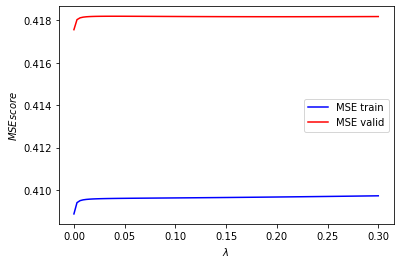

In [ ]:
file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP2/winequality-red.csv"
# Pour les blancs
#file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP2/winequality-white.csv"
wine_data = pd.read_csv(file_path, sep=";")
wine_data

# Séparation des variables
y = wine_data["quality"]
X = wine_data.drop(["quality"], axis=1)

# Séparation du jeu de données 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Recherche de l'hyperparamètre
ridge = Ridge()
hyps = np.linspace(0, 0.3, 100)
k = 5
param_dict = {"alpha": hyps}
gride_search = GridSearchCV(ridge, 
                            param_dict, 
                            scoring=mse_score,
                            cv=k, 
                            return_train_score=True)
gride_search.fit(X_train, y_train)

# Le meilleur paramètre 
print(gride_search.best_params_)

# Le graphique
train_score = gride_search.cv_results_["mean_train_score"]
val_score = gride_search.cv_results_["mean_test_score"]
fig, ax = plt.subplots()
ax.plot(hyps, -train_score, c="blue", label="MSE train")
ax.plot(hyps, -val_score, c="red", label="MSE valid")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("$MSE score$")
ax.legend()
plt.plot()

# L'erreur de généralisation 
y_pred = gride_search.best_estimator_.predict(X_test)
MSE_test = np.mean((y_pred - y_test)**2)
print(MSE_test)